# Importing Required Libraries

In [1]:
print("--Started--")
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from dateconv import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
print("--Ended Successfully--")

--Started--
--Ended Successfully--


# Creating Various Functions

In [2]:
#This function will help to extract date and time from the .txt file

def startsWithDateAndTimeAndroid(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False
print("--Ended Successfully--")

--Ended Successfully--


In [3]:
def startsWithDateAndTimeios(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False
print("--Ended Successfully--")

--Ended Successfully--


In [4]:
#This function helps in extracting Authors/Senders Name

def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False
print("--Ended Successfully--")

--Ended Successfully--


In [5]:
#Consider following message "Mohini Maam: Come for practicals at 11 am sharp", for analysis we need to split authors name and message


def getDataPointAndroid(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(':') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message
print("--Ended Successfully--")

--Ended Successfully--


In [6]:
def getDataPointios(line):
    splitLine = line.split('] ')
    dateTime = splitLine[0]
    if ',' in dateTime:
        date, time = dateTime.split(',')
    else:
        date, time = dateTime.split(' ')
    message = ' '.join(splitLine[1:])
    if FindAuthor(message):
        splitMessage = message.split(':')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    if time[5]==":":
        time = time[:5]+time[-3:]
    else:
        if 'AM' in time or 'PM' in time:
            time = time[:6]+time[-3:]
        else:
            time = time[:6]
    return date, time, author, message
print("--Ended Successfully--")

--Ended Successfully--


In [7]:
#In some messages we have emojis, we need to get the exact count of it.

def split_count(text):

    emoji_list = []
    emojis_iter = map(lambda y: y, emoji.UNICODE_EMOJI['en'].keys())
    regex_set = re.compile('|'.join(re.escape(em) for em in emojis_iter))
    emoji_list = regex_set.findall(text)
    return emoji_list
print("--Ended Successfully--")

--Ended Successfully--


In [8]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = 'BE A Comp.txt'
# conversationPath = '_chat.txt'
with open(conversationPath, encoding="utf-8") as fp:
    device=''
    first=fp.readline()
    print(first)
    if '[' in first:
      device='ios'
    else:
      device="android"
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None #message contains 4 things-"date","time","author","message" 
    while True:
        line = fp.readline() 
        if not line: 
            break
        if device=="ios":
          line = line.strip()
          if startsWithDateAndTimeios(line):
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointios(line)
            messageBuffer.append(message)
          else:
            line= (line.encode('ascii', 'ignore')).decode("utf-8")
            if startsWithDateAndTimeios(line):
              if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
              messageBuffer.clear()
              date, time, author, message = getDataPointios(line)
              messageBuffer.append(message)
            else:
              messageBuffer.append(line)
        else:
          line = line.strip()
          if startsWithDateAndTimeAndroid(line): 
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointAndroid(line)
            messageBuffer.append(message)
          else:
            messageBuffer.append(line)
print("--Ended Successfully--")

28/05/19, 2:46 pm - You created group "🔹 SE Comp_A  2019-20 🔹"

--Ended Successfully--


In [9]:
if device =='android':
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.dropna()
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
else:
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
        df = df.dropna()
#         df["Date"] = df["Date"].apply(dateconv)
        df["Date"] = pd.to_datetime(df["Date"])
        df["Date"] = pd.to_datetime(df["Date"],format='%Y-%m-%d')
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
print("--Ended Successfully--")

--Ended Successfully--


In [10]:
df.head(20) #return first two rows of dataframe

Date      Time               Author  \
0  2020-02-29   7:33 pm      Tanmay Gangurde   
1  2020-01-03  12:46 am       Suyash Dypatil   
2  2020-01-03   3:40 pm            Mily Maam   
3  2020-01-03  10:09 pm            Sahil DSE   
4  2020-02-03   9:07 am            Mily Maam   
5  2020-02-03  11:04 am          Mohini Maam   
6  2020-02-03  11:08 am      +91 90218 86644   
7  2020-02-03  11:08 am          Mohini Maam   
8  2020-02-03  11:13 am          Mohini Maam   
9  2020-02-03   2:09 pm           Vishal Sir   
11 2020-02-03   3:52 pm            Mily Maam   
12 2020-02-03   3:56 pm           Naresh Sir   
13 2020-03-03  10:24 am  Suwarna Patil Ma'am   
15 2020-03-03  11:08 am        Sandhya Ma'am   
16 2020-03-03  11:14 am           Vishal Sir   
17 2020-03-03  11:18 am          Mohini Maam   
18 2020-03-03   2:02 pm        Sandhya Ma'am   
19 2020-03-03   2:11 pm    Deepak Dypatil CS   
20 2020-03-03   2:26 pm      +91 90218 86644   
21 2020-03-03   3:03 pm            Mily Maam   

                                              Message      emoji  urlcount  
0                            You deleted this message         []         0  
1                                  Congratulations🥳🥳🥳  [🥳, 🥳, 🥳]         0  
2                                            Reminder         []         0  
3                            This message was deleted         []         0  
4                               This week's timetable         []         0  
5                        Come to lab 5 at 11.15 sharp         []         0  
6                            This message was deleted         []         0  
7             They all are having QT creator workshop         []         0  
8                                    Come immediately         []         0  
9                                 SE A4 come to lab 4         []         0  
11                              Plz fill the feedback         []         0  
12   Mr. Sahil (Diploma Student) please meet me af...         []         0  
13                                    <Media omitted>         []         0  
15         A1 batch come for ADS lab in computer lab1         []         0  
16                             A4 batch come to lab 4         []         0  
17   Karan ballurgi Saurabh singh Harish dhake Mee...         []         0  
18         A2 batch come to computer lab1 for ads lab         []         0  
19   A3 batch come to computer lab 4 for CG practi...         []         0  
20                 A2 & A4 come to lab 1 immediately.         []         0  
21   Those who haven't filled the workshop feedbac...         []         0

In [11]:
df.info() #statistics of the group chat

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5564 entries, 0 to 6247
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5564 non-null   datetime64[ns]
 1   Time      5564 non-null   object        
 2   Author    5564 non-null   object        
 3   Message   5564 non-null   object        
 4   emoji     5564 non-null   object        
 5   urlcount  5564 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 304.3+ KB


In [12]:
df.Author.unique() #returns all unique athors means all members of group

print(df.Author.unique())

['Tanmay Gangurde' 'Suyash Dypatil' 'Mily Maam' 'Sahil DSE' 'Mohini Maam'
 '+91 90218 86644' 'Vishal Sir' 'Naresh Sir' "Suwarna Patil Ma'am"
 "Sandhya Ma'am" 'Deepak Dypatil CS' 'Aman Mulani' 'Palash' 'Rohit Pawar'
 'Suraj' 'Akanksha Bothe' 'Srilekha' 'Simran' 'Poorva'
 'Sakshi Walzade Dypatil CS' 'Yash Updater' '+91 94223 25572'
 'Pratiksha Sevataker HOD COMPSA' '+91 99212 57325' 'Malhar' 'Ishwar Sir'
 'Dewashish Ranade Dypatil' 'Prathamesh Ballal Dyp Cs'
 'Sangameshwar DYPatil CS' 'Soham' 'Sakshi DY' 'Apeakesha Dypatil CS'
 'Vidhi DYPatil CS' 'Amol Dhakane Sir TG Dypatil' "Shivganga Ma'am"
 'Vanita Daddi Maam' "Naleeni Ma'am" 'Sachin Jadhav Sir'
 'Ramesh Sir Math Dypatil' 'Utkarsha DSE' '+91 76665 83191'
 'Nikhil Agarwal Astronomy' '+91 70280 53527'
 'Akanksha Pidharkar Dypatil Cs' 'Tanvi, Dypatil CS' '+91 88060 84625'
 'Pratima' 'Akash wagh' 'Gayatri' 'Tejas DSE' 'Harish DY' 'Divyansh'
 '+91 98608 02791' '+91 72910 36789' 'Sanket Nikam' 'Sharada'
 'Manisha Bhende Maam' 'Jatin' '+91 

In [13]:
df = df.dropna() #drops all null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5564 entries, 0 to 6247
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5564 non-null   datetime64[ns]
 1   Time      5564 non-null   object        
 2   Author    5564 non-null   object        
 3   Message   5564 non-null   object        
 4   emoji     5564 non-null   object        
 5   urlcount  5564 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 304.3+ KB


In [14]:
total_messages = df.shape[0]
print(total_messages)

5564


In [15]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

0


In [16]:
emojis = sum(df['emoji'].str.len()) 
print(emojis)

8275


In [17]:
URLPATTERN = r'(https?://\S+)' #regex pattern matching with start with https
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len() #return url which matches with pattern and count it through lambda function
links = np.sum(df.urlcount) #sumup all the links
print(links)

1374


# Let us separate media messages and text messages

In [18]:
link_messages= df[df['urlcount']>0]
deleted_messages=df[(df["Message"] == " You deleted this message")| (df["Message"] == " This message was deleted.")]
media_messages_df = df[(df['Message'] == ' <Media omitted>')|(df['Message'] == ' image omitted')|(df['Message'] == ' video omitted')|(df['Message'] == ' sticker omitted')]
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
messages_df = messages_df.drop(link_messages.index)

In [19]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 1 to 6247
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3687 non-null   datetime64[ns]
 1   Time      3687 non-null   object        
 2   Author    3687 non-null   object        
 3   Message   3687 non-null   object        
 4   emoji     3687 non-null   object        
 5   urlcount  3687 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 201.6+ KB


# Now let's calculate words and letters

In [20]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' '))) #word is calculated by spliting sentence by whitespace
messages_df["MessageCount"]=1

In [21]:
messages_df.tail(10)

Date      Time                       Author  \
6228 2021-05-11  11:53 am                Sandhya Ma'am   
6230 2021-08-11   4:12 pm                Sandhya Ma'am   
6232 2021-09-11   1:33 pm                Sandhya Ma'am   
6236 2021-10-11   3:23 pm              +91 95613 81703   
6238 2021-10-11   3:28 pm  Amol Dhakane Sir TG Dypatil   
6239 2021-10-11   3:33 pm              +91 95613 81703   
6240 2021-11-11   2:00 pm              +91 95613 81703   
6242 2021-12-11  12:07 pm  Amol Dhakane Sir TG Dypatil   
6246 2021-11-14  12:33 pm          Manisha Bhende Maam   
6247 2021-11-14   8:43 pm  Amol Dhakane Sir TG Dypatil   

                                                Message  \
6228   📍📍📍 *Prelim Exam*📍📍📍  📌 All TE/BE students ar...   
6230                          *Prelim Exams Postponed*.   
6232   *Online theory lectures and offline practical...   
6236   Please inform Hitesh Sanjay Katariya to be av...   
6238   This will be your official record of activiti...   
6239                Hitesh kartaria call me immediately   
6240   Gaytri marathe and akash wagh contact me imme...   
6242                           This message was deleted   
6246   LP II miniproject  submission review is sched...   
6247   *List of Evaluators and guides for LP-II*  Gr...   

                      emoji  urlcount  Letter_Count  Word_Count  MessageCount  
6228  [📍, 📍, 📍, 📍, 📍, 📍, 📌]         0           222          41             1  
6230                     []         0            26           4             1  
6232                     []         0            94          16             1  
6236                     []         0           132          27             1  
6238                     []         0            62          11             1  
6239                     []         0            36           6             1  
6240                     []         0            73          12             1  
6242                     []         0            25           5             1  
6246                     []         0           280          47             1  
6247                     []         0           165          34             1

In [22]:
messages_df["emojicount"]= df['emoji'].str.len()

# Most used emoji

In [23]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

177


In [24]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('📢', 396), ('🥳', 316), ('💐', 241), ('🏻', 210), ('⭕', 202), ('🛑', 179), ('🎉', 173), ('👍', 147), ('✅', 133), ('🎊', 130), ('👆', 118), ('💯', 117), ('✨', 116), ('⚜️', 106), ('📍', 101), ('👏', 78), ('📌', 74), ('🔥', 72), ('‼️', 71), ('🙏', 67), ('😊', 59), ('😇', 55), ('🔹', 51), ('🕚', 49), ('⏰', 47), ('🟥', 42), ('🔖', 41), ('🔅', 35), ('🏆', 34), ('🏼', 32), ('💥', 31), ('🤩', 29), ('💫', 25), ('👇', 24), ('✳️', 22), ('🌀', 22), ('🕹️', 22), ('🟣', 21), ('⚠️', 21), ('😁', 20), ('🤞', 19), ('😅', 18), ('✌', 16), ('▪️', 16), ('❤️', 15), ('🙌', 15), ('💻', 14), ('💡', 13), ('🔻', 13), ('🔰', 13), ('😂', 12), ('🚫', 12), ('🇮🇳', 12), ('🔴', 11), ('☘️', 10), ('🤍', 9), ('☺️', 9), ('〽️', 9), ('🔺', 8), ('🔸', 8), ('👨', 7), ('☺', 6), ('😄', 6), ('👌', 6), ('👩', 6), ('📝', 6), ('🪔', 6), ('🖱️', 6), ('✳', 5), ('🤟', 5), ('➰', 5), ('🔶', 5), ('◽', 5), ('🎁', 5), ('♻️', 5), ('🌸', 5), ('🏡', 4), ('❌', 4), ('☑️', 4), ('🏅', 4), ('🦚', 4), ('💚', 4), ('🤝', 4), ('◼️', 4), ('📧', 4), ('❇️', 4), ('♨️', 4), ('📣', 4), ('🙂', 3), ('❓', 3), ('⏳', 3), ('

In [25]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

emoji  count
0       📢    396
1       🥳    316
2       💐    241
3       🏻    210
4       ⭕    202
..    ...    ...
172     😏      1
173     🧑      1
174    ☝️      1
175     😜      1
176     🤓      1

[177 rows x 2 columns]

In [26]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Author wise

In [27]:
frnds = messages_df.Author.unique()

for i in range(len(frnds)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == frnds[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {frnds[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == frnds[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(link_messages[link_messages['Author'] == frnds[i]]["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of Suyash Dypatil -
Messages Sent 46
Words per message 15.41304347826087
Media Messages Sent 5
Emojis Sent 125
Links Sent 2

Stats of Mily Maam -
Messages Sent 136
Words per message 19.235294117647058
Media Messages Sent 41
Emojis Sent 103
Links Sent 42

Stats of Sahil DSE -
Messages Sent 10
Words per message 22.3
Media Messages Sent 1
Emojis Sent 1
Links Sent 0

Stats of Mohini Maam -
Messages Sent 57
Words per message 16.087719298245613
Media Messages Sent 9
Emojis Sent 71
Links Sent 10

Stats of +91 90218 86644 -
Messages Sent 22
Words per message 7.454545454545454
Media Messages Sent 6
Emojis Sent 67
Links Sent 12

Stats of Vishal Sir -
Messages Sent 50
Words per message 11.36
Media Messages Sent 12
Emojis Sent 20
Links Sent 22

Stats of Naresh Sir -
Messages Sent 84
Words per message 25.11904761904762
Media Messages Sent 32
Emojis Sent 20
Links Sent 66

Stats of Sandhya Ma'am -
Messages Sent 52
Words per message 17.384615384615383
Media Messages Sent 11
Emojis Sent 168
Links

Messages Sent 2
Words per message 13.0
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of Spersh Goyal -
Messages Sent 3
Words per message 6.333333333333333
Media Messages Sent 0
Emojis Sent 5
Links Sent 1

Stats of +91 74105 51404 -
Messages Sent 8
Words per message 50.25
Media Messages Sent 1
Emojis Sent 0
Links Sent 0

Stats of Abhishek Nighde -
Messages Sent 8
Words per message 84.0
Media Messages Sent 0
Emojis Sent 12
Links Sent 0

Stats of +91 89992 96386 -
Messages Sent 1
Words per message 5.0
Media Messages Sent 0
Emojis Sent 4
Links Sent 1

Stats of +91 93223 63687 -
Messages Sent 13
Words per message 25.384615384615383
Media Messages Sent 1
Emojis Sent 10
Links Sent 0

Stats of Ketaki Bhoyar Ma'am -
Messages Sent 93
Words per message 15.311827956989248
Media Messages Sent 42
Emojis Sent 160
Links Sent 142

Stats of +91 95613 81703 -
Messages Sent 54
Words per message 14.537037037037036
Media Messages Sent 14
Emojis Sent 21
Links Sent 43

Stats of Shivnarayan Dypatil C

# Times of day

Text(0, 0.5, 'Time')

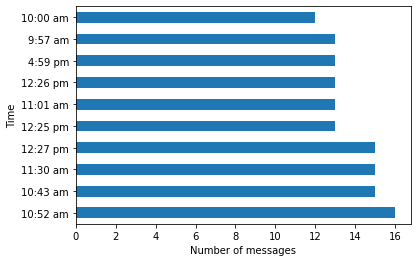

In [28]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

There are 403039 words in all the messages.


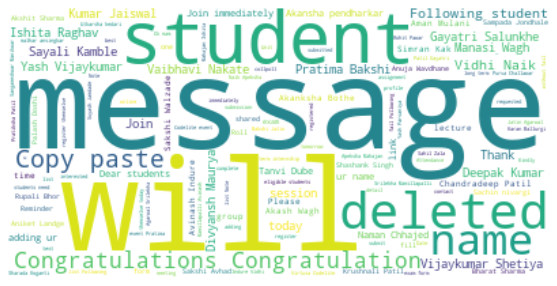

In [32]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Manisha Bhende Maam


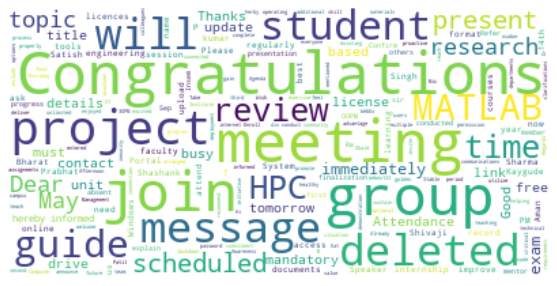


Author name Mily Maam


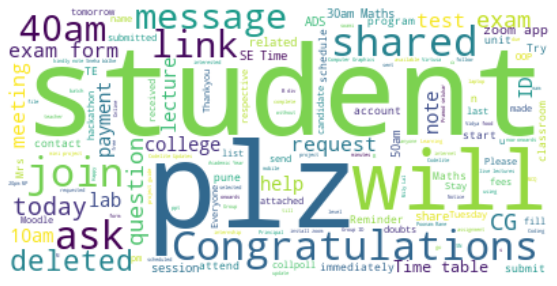


Author name Amol Dhakane Sir TG Dypatil


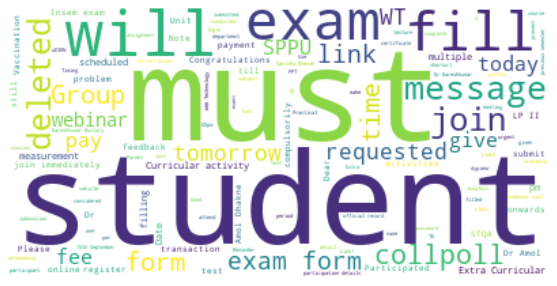


Author name Naresh Sir


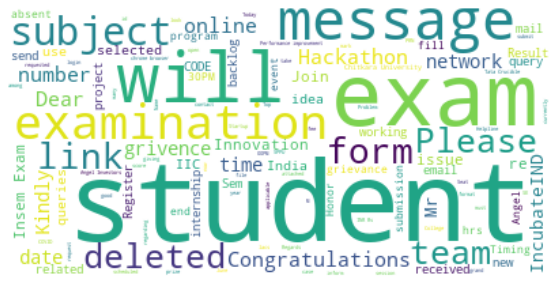


Author name Suwarna Patil Ma'am


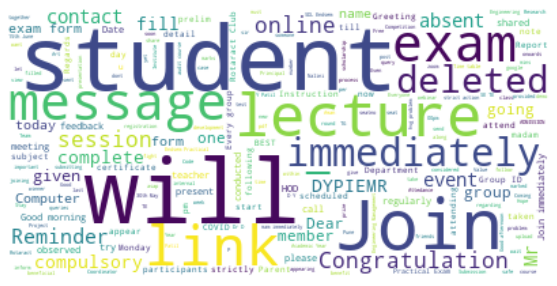


Author name Aman Mulani


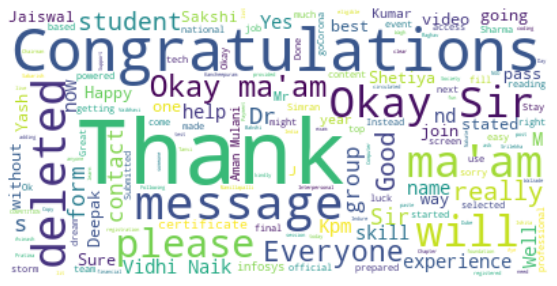


Author name Yash Updater


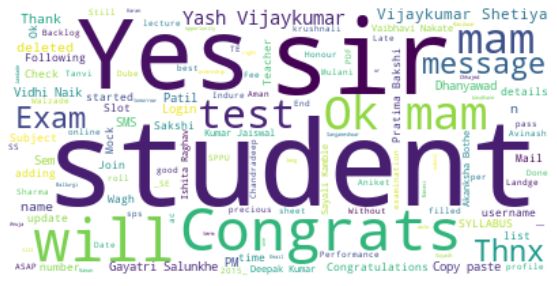

In [30]:
l = ["Manisha Bhende Maam","Mily Maam", "Amol Dhakane Sir TG Dypatil",  "Naresh Sir", "Suwarna Patil Ma'am", "Aman Mulani","Yash Updater"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  print()